# This is a Multivariate Time Series Forecasting problem on Macro economics dataset, used VAR(Vector AutoRegression) technique to implement it

In [1]:
#Import Packages
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sb
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Data Pull
mdata = sm.datasets.macrodata.load_pandas().data
print(mdata.head())
print('Data rows & columns ',mdata.shape)
mdata.describe()

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  
Data rows & columns  (203, 14)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


In [3]:
#Setting Dateindex 
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata.index = pd.DatetimeIndex(quarterly)
mdata.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
#Features Selection for Multivariate Forecast
mdata = mdata[['realgdp','realcons','realinv']]
mdata.head()

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722


realgdp     0
realcons    0
realinv     0
dtype: int64


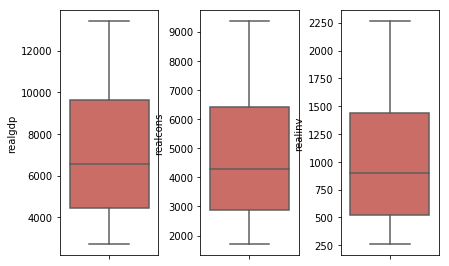

In [6]:
#Checking for MissingValues and Outliers
print(mdata.isnull().sum()) #There are no missing values
f, axes = plt.subplots(1, 3)
f.tight_layout() 
sb.boxplot(y=mdata['realgdp'],palette='hls',ax=axes[0]) #There are no outliers in the 3columns of data
sb.boxplot(y=mdata['realcons'],palette='hls',ax=axes[1])
sb.boxplot(y=mdata['realinv'],palette='hls',ax=axes[2])

ADF Statistic: 1.750463
p-value: 0.998246
ADF Statistic: 1.549912
p-value: 0.997699
ADF Statistic: -1.257252
p-value: 0.648496
########After Differencing###########
ADF Statistic: -6.972871
p-value: 0.000000
ADF Statistic: -4.991971
p-value: 0.000023
ADF Statistic: -12.218963
p-value: 0.000000


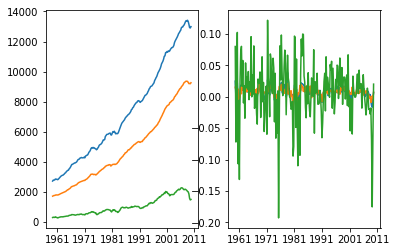

In [7]:
#Checking Data is in Stationary or not(VAR works only on stationary dataset)
fig,[ax0,ax1] = plt.subplots(1, 2)
result = adfuller(mdata['realgdp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

result = adfuller(mdata['realcons'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

result = adfuller(mdata['realinv'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ax0.plot(mdata['realgdp'])
ax0.plot(mdata['realcons'])
ax0.plot(mdata['realinv'])

#H0:Null hypothesis - Data is non-stationary
#H0:Alternative hypothesis - Data is stationary

#p_value > 0.05,so we are unable to reject null hypothesis.Hence here data is non stationary, 
#As a next step, we try to make it stationary by using first-differencing
data = np.log(mdata).diff().dropna()

print('########After Differencing###########')

result = adfuller(data['realgdp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

result = adfuller(data['realcons'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

result = adfuller(data['realinv'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ax1.plot(data['realgdp'])
ax1.plot(data['realcons'])
ax1.plot(data['realinv'])

#Now p_values < 0.05,so we are able to reject null hypothesis.Hence here data is stationary, 

In [11]:
#creating the train and validation set
data = data[['realgdp','realcons','realinv']]
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]
print('Train Datset Rows and Columns:',train.shape)
print('Valid Dataset Rows and Columns:',valid.shape)

Train Datset Rows and Columns: (161, 3)
Valid Dataset Rows and Columns: (41, 3)


In [17]:
#Fitting the VAR model on data
model = VAR(endog=train)
model_fit = model.fit()#We can choose desire lag-order(like-fit(2)/fit(2)), so that model can have least AIC(Goodness of fit) value can be selected,
                      #as best model for our underlying data.
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 11, Jan, 2019
Time:                     15:50:31
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4351
Nobs:                     160.000    HQIC:                  -27.5721
Log likelihood:           1544.17    FPE:                9.65888e-13
AIC:                     -27.6658    Det(Omega_mle):     8.96923e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.004433         0.001085            4.084           0.000
L1.realgdp         -0.308653         0.199805           -1.545           0.124
L1.realcons         0.677820         0.151911            4.462    

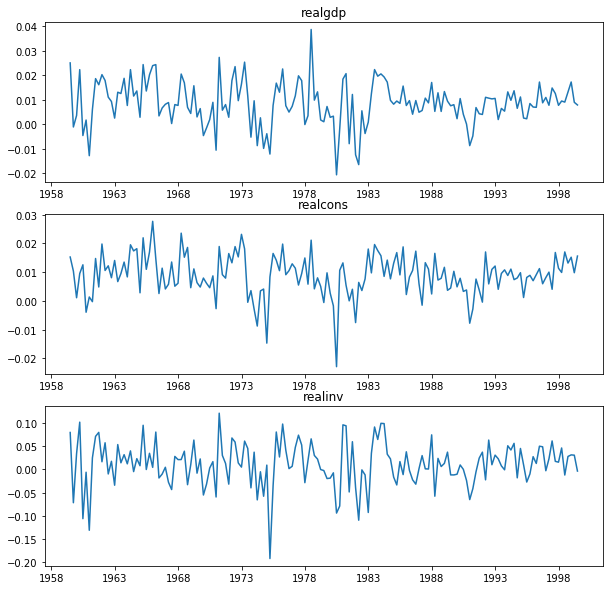

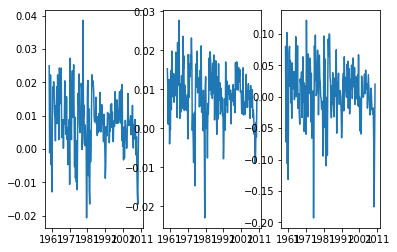

In [21]:
#We can compare how model got fitted with actual values through visulaisation
model_fit.plot()
fig = plt.figure()

fig,[ax0,ax1,ax2] = plt.subplots(1, 3)


ax0.plot(data['realgdp'])

ax1.plot(data['realcons'])

ax2.plot(data['realinv'])

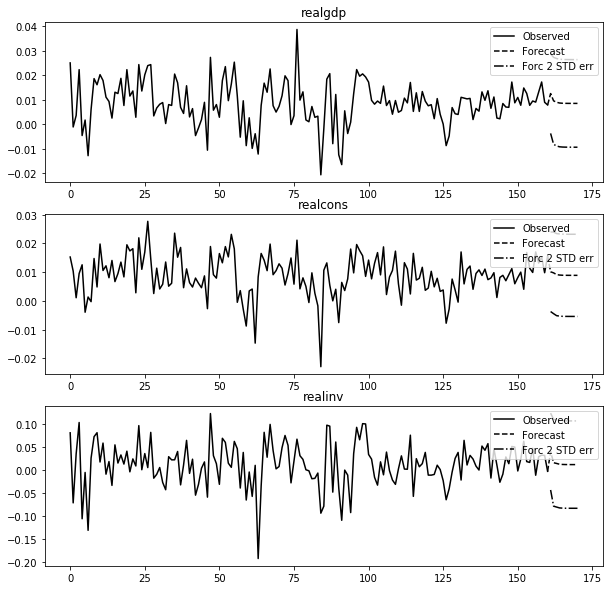

In [19]:
# Make Forecast on validation dataset
prediction = model_fit.forecast(model_fit.y, steps=len(valid))
model_fit.plot_forecast(10)

In [20]:
#Converting predictions to dataframe
cols=['realgdp','realcons','realinv']
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,3):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))
    
#Hence RMSE are lower in values,so we can say model has performed well.
#we can also choose different lag-order value while fitting the model,so that it can results into lower AIC value and 
    #lower rmse for forecasted values

rmse value for realgdp is :  0.007858791057926912
rmse value for realcons is :  0.005928932456721604
rmse value for realinv is :  0.04291384648168377
